## BDCC Assignment: Mini Project -  Indian Premier League (IPL) Data Analysis

#### Team Members

12120067 - Bhargavi Peddapati <br>
12120019 - Sriya Paruchuri <br>
12120045 - Madhab Chakraborty <br>
12120095 - Nararaj G T <br>
12120087 - Rama Gangadhar Durvasula <br>

### Section - Dataset

**Objective :** Select a reasonably sized dataset with at least two files and one file having at least 6 columns and 1 MB in size, define a schema and load the data into the pipeline while ensuring handling of bad records. <br>
**Approach  :** We have searched the dataset in Kaggle site. Defined custom schema and loaded data from dbfs:/FileStore/tables/ipl_datasets and loaded into the pipeline

d
#### IPL Dataset Description <br>



We have selected Indian Premier League (IPL) dataset from Kaggle site. Here, is the link for the site to download the dataset.

- https://github.com/Bhargavi-6/BDCC_Group1_Assignment/blob/a22aa23bda2f908bdadc6aabeda36c4a1dea4b64/datasets/matches.csv
- https://github.com/Bhargavi-6/BDCC_Group1_Assignment/blob/a22aa23bda2f908bdadc6aabeda36c4a1dea4b64/datasets/deliveries.csv <br>

This dataset contains information about the matches and players in the Indian Premier League (IPL) matches between 2008 and 2016. <br>
It has two CSV files, one with data on matches and another with data on players. 
<br>

  - **matches.csv with size 117.1 KB and 18 number of columns**
  - **deliveries.csv with size 15.44 MB and 21 number of columns**
  
##### Description on matches.csv - This dataset contains each match information


- id: A unique identifier for each match played in IPL.
- season: The year in which the IPL tournament was played.
- city: The name of the city where the match was played.
- date: The date on which the match was played.
- team1: The name of the first team playing in the match.
- team2: The name of the second team playing in the match.
- toss_winner: The name of the team that won the toss.
- toss_decision: The decision made by the team that won the toss, whether to bat or field.
- result: The result of the match, whether it was a win, loss or a tie.
- dl_applied: A binary field indicating whether the Duckworth-Lewis (DL) method was applied to the match. The DL method is a mathematical formula used to calculate the target score for the team batting second in a rain-affected match.
- winner: The name of the winning team in the match.
- win_by_runs: The number of runs by which the winning team won the match.
- win_by_wickets: The number of wickets by which the team won.
- player_of_match: The name of the player who played well in the match.
- venue: The name of the stadium where the match was played.
- umpire1: The name of the first umpire who officiated the match.
- umpire2: The name of the second umpire who officiated the match.
- umpire3: The name of the third umpire who officiated the match (if any).


##### Description on deliveries.csv - This dataset contains each ball details for all the seasons matches

- match_id: A unique identifier for each match played in IPL.
- inning: The inning number of the match (1st or 2nd).
- batting_team: The name of the team that is currently batting.
- bowling_team: The name of the team that is currently bowling.
- over: The over number of the match.
- ball: The ball number of the over.
- batsman: The name of the batsman who is currently facing the ball.
- non_striker: The name of the non-striking batsman.
- bowler: The name of the bowler who is currently bowling.
- is_super_over: A binary field indicating whether the current over is a Super Over.
- wide_runs: The number of runs scored on a wide delivery.
- bye_runs: The number of runs scored on a bye.
- legbye_runs: The number of runs scored on a leg bye.
- noball_runs: The number of runs scored on a no-ball delivery.
- penalty_runs: The number of runs scored on a penalty.
- batsman_runs: The number of runs scored by the batsman on this delivery.
- extra_runs: The total number of extra runs scored on this delivery (wide, bye, leg bye, no ball, penalty).
- total_runs: The total number of runs scored on this delivery (batsman runs + extra runs).
- player_dismissed: The name of the batsman who got out on this delivery (if any).
- dismissal_kind: The type of dismissal on this delivery (if any), such as caught, bowled, run out, etc.
- fielder: The name of the fielder who caught or ran out the batsman



#### Loading data onto DBFS

- Go to **Data** on the left menu
- Click on **Create Table**
- Add **ipl_datasets** to /FileStore/tables directory path
- Drag and drop files or Upload the file onto the DBFS location: **/FileStore/tables/tables/ipl_datasets/** under **Files** section.

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

#### Loading the dataset

- Data is provided in *csv* format. Spark provides *sqlContext.read.csv* to read the csv data and create the dataframe. 
- Spark can automatically infer the schema from the data if *inferSchema* is set to True. But we are defining custom schema.

In [0]:
%fs ls /FileStore/tables/ipl_datasets/

path,name,size,modificationTime
dbfs:/FileStore/tables/ipl_datasets/deliveries.csv,deliveries.csv,15442270,1678101160000
dbfs:/FileStore/tables/ipl_datasets/matches.csv,matches.csv,117096,1678101115000


### Define schema for matches.csv

In [0]:
from pyspark.sql.types import *

# Define schema for matches.csv
matches_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("season", IntegerType(), True),
    StructField("city", StringType(), True),
    StructField("date", StringType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("toss_decision", StringType(), True),
    StructField("result", StringType(), True),
    StructField("dl_applied", IntegerType(), True),
    StructField("winner", StringType(), True),
    StructField("win_by_runs", IntegerType(), True),
    StructField("win_by_wickets", IntegerType(), True),
    StructField("player_of_match", StringType(), True),
    StructField("venue", StringType(), True),
    StructField("umpire1", StringType(), True),
    StructField("umpire2", StringType(), True),
    StructField("umpire3", StringType(), True)
])


In [0]:
matches_df = sqlContext.read.csv("dbfs:/FileStore/tables/ipl_datasets/matches.csv", 
                                header = True, 
                                schema = StructType(matches_schema) )
matches_df.cache()
matches_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- season: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- date: string (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- result: string (nullable = true)
 |-- dl_applied: integer (nullable = true)
 |-- winner: string (nullable = true)
 |-- win_by_runs: integer (nullable = true)
 |-- win_by_wickets: integer (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)
 |-- umpire3: string (nullable = true)



In [0]:
matches_df.show(5)

+---+------+---------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+--------------+-------------+-------+
| id|season|     city|      date|               team1|               team2|         toss_winner|toss_decision|result|dl_applied|              winner|win_by_runs|win_by_wickets|player_of_match|               venue|       umpire1|      umpire2|umpire3|
+---+------+---------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+--------------+-------------+-------+
|  1|  2017|Hyderabad|2017-04-05| Sunrisers Hyderabad|Royal Challengers...|Royal Challengers...|        field|normal|         0| Sunrisers Hyderabad|         35|             0|   Yuvraj Singh|Rajiv Gandhi Inte...|   AY Dandekar|     NJ Llong|   nu

#### Memory Consumed to store the matches dataframe

In [0]:
spark._jvm.org.apache.spark.util.SizeEstimator.estimate(matches_df._jdf)

Out[5]: 55359808

#### Partitions the matches dataframe has

The dataframes are internally stores as RDDs and partitions. To find number of partitions.

In [0]:
matches_df.rdd.getNumPartitions()

Out[6]: 1

### Define schema for deliveries.csv

In [0]:
# Define schema for deliveries.csv
deliveries_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("inning", IntegerType(), True),
    StructField("batting_team", StringType(), True),
    StructField("bowling_team", StringType(), True),
    StructField("over", IntegerType(), True),
    StructField("ball", IntegerType(), True),
    StructField("batsman", StringType(), True),
    StructField("non_striker", StringType(), True),
    StructField("bowler", StringType(), True),
    StructField("is_super_over", IntegerType(), True),
    StructField("wide_runs", IntegerType(), True),
    StructField("bye_runs", IntegerType(), True),
    StructField("legbye_runs", IntegerType(), True),
    StructField("noball_runs", IntegerType(), True),
    StructField("penalty_runs", IntegerType(), True),
    StructField("batsman_runs", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("total_runs", IntegerType(), True),
    StructField("player_dismissed", StringType(), True),
    StructField("dismissal_kind", StringType(), True),
    StructField("fielder", StringType(), True)
])

In [0]:
deliveries_df = sqlContext.read.csv("dbfs:/FileStore/tables/ipl_datasets/deliveries.csv", 
                                header = True, 
                                schema = StructType(deliveries_schema) )
deliveries_df.cache()
deliveries_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)
 |-- over: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- is_super_over: integer (nullable = true)
 |-- wide_runs: integer (nullable = true)
 |-- bye_runs: integer (nullable = true)
 |-- legbye_runs: integer (nullable = true)
 |-- noball_runs: integer (nullable = true)
 |-- penalty_runs: integer (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- fielder: string (nullable = true)



#### Memory Consumed to store the deliveries dataframe

In [0]:
spark._jvm.org.apache.spark.util.SizeEstimator.estimate(deliveries_df._jdf)

Out[9]: 55893864

#### Partitions the deliveries dataframe has

The dataframes are internally stores as RDDs and partitions. To find number of partitions.

In [0]:
deliveries_df.rdd.getNumPartitions()

Out[10]: 4

### Section - Business Insights

**Objective :** 5 key business insights needs to derive from the data <br>
**Approach  :** We have gone through the dataset and figured out the below mentions business insights

- **Player Performance Analysis:** IPL dataset can be used to analyse the performance of the individual players over the years. This analysis can help franchise owners in player selection, predicting player performance, and negotiating player contracts.
- **Team Performance Analysis:** IPL dataset can be used to analyse the performance of teams over the years. This analysis can help franchise owners in identifying the strengths and weaknesses of their teams, optimizing team strategy, and making informed decisions about team management.
- **Audience Engagement Analysis:** IPL is one of the most-watched sporting events in India, and the dataset can be used to analyse the audience engagement levels over the years. This analysis can help advertisers in understanding the audience demographics and targeting their ads more effectively.
- **Sponsorship ROI Analysis:** IPL is known for its high sponsorship deals, and the dataset can be used to analyse the return on investment (ROI) for sponsors. This analysis can help sponsors in making informed decisions about future investments in the IPL.
- **Fan Sentiment Analysis:** IPL dataset can also be used to analyse the sentiment of fans towards teams and players. This analysis can help franchise owners in understanding their fan base, identifying potential areas of improvement, and making informed decisions about marketing and promotions.

#### Define the pipeline

In [0]:

dbutils.fs.rm("dbfs:/user/hive/warehouse/matches", True)
dbutils.fs.rm("dbfs:/user/hive/warehouse/deliveries", True)


Out[11]: True

In [0]:
from pyspark.sql.functions import col, round, sum

matches_df.write.mode("overwrite").saveAsTable("matches")
deliveries_df.write.mode("overwrite").saveAsTable("deliveries")

Total number of matches played in each season

In [0]:
%sql

SELECT season, COUNT(*) AS total_matches
FROM matches
GROUP BY season
ORDER BY season

season,total_matches
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60
2017,59


Number of matches won by each team

In [0]:
%sql
SELECT winner, COUNT(*) AS total_wins
FROM matches
WHERE result = 'normal'
GROUP BY winner
ORDER BY total_wins DESC


winner,total_wins
Mumbai Indians,91
Chennai Super Kings,79
Kolkata Knight Riders,77
Royal Challengers Bangalore,72
Kings XI Punjab,68
Delhi Daredevils,62
Rajasthan Royals,61
Sunrisers Hyderabad,41
Deccan Chargers,29
Gujarat Lions,13


Total runs scored by each team in each season

In [0]:
%sql
SELECT season, batting_team, SUM(total_runs) AS total_runs_scored
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
GROUP BY season, batting_team
ORDER BY season, total_runs_scored DESC


season,batting_team,total_runs_scored
2008,Rajasthan Royals,2601
2008,Chennai Super Kings,2520
2008,Kings XI Punjab,2464
2008,Deccan Chargers,2229
2008,Delhi Daredevils,2118
2008,Mumbai Indians,2080
2008,Royal Challengers Bangalore,1983
2008,Kolkata Knight Riders,1942
2009,Deccan Chargers,2408
2009,Royal Challengers Bangalore,2280


Total wickets taken by each team in each season

In [0]:
%sql
SELECT season, bowling_team, COUNT(*) AS total_wickets_taken
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
WHERE dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt'
GROUP BY season, bowling_team
ORDER BY season, total_wickets_taken DESC


season,bowling_team,total_wickets_taken
2008,Rajasthan Royals,96
2008,Kings XI Punjab,83
2008,Chennai Super Kings,83
2008,Mumbai Indians,83
2008,Delhi Daredevils,82
2008,Kolkata Knight Riders,61
2008,Deccan Chargers,60
2008,Royal Challengers Bangalore,56
2009,Deccan Chargers,97
2009,Delhi Daredevils,91


Total extras given by each team in each season

In [0]:
%sql
SELECT season, bowling_team, SUM(extra_runs) AS total_extras_given
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
GROUP BY season, bowling_team
ORDER BY season, total_extras_given DESC


season,bowling_team,total_extras_given
2008,Chennai Super Kings,160
2008,Kolkata Knight Riders,152
2008,Royal Challengers Bangalore,152
2008,Deccan Chargers,145
2008,Kings XI Punjab,142
2008,Mumbai Indians,133
2008,Rajasthan Royals,126
2008,Delhi Daredevils,118
2009,Delhi Daredevils,151
2009,Mumbai Indians,149


Number of matches won by each team in each city

In [0]:
%sql
SELECT winner, city, COUNT(*) AS total_wins
FROM matches
WHERE result = 'normal'
GROUP BY winner, city
ORDER BY total_wins DESC


winner,city,total_wins
Mumbai Indians,Mumbai,45
Kolkata Knight Riders,Kolkata,37
Chennai Super Kings,Chennai,33
Royal Challengers Bangalore,Bangalore,29
Rajasthan Royals,Jaipur,24
Delhi Daredevils,Delhi,23
Kings XI Punjab,Chandigarh,22
Sunrisers Hyderabad,Hyderabad,19
Mumbai Indians,Kolkata,9
Chennai Super Kings,Mumbai,8


Total runs scored by each team in each city

In [0]:
%sql
SELECT city, batting_team, SUM(total_runs) AS total_runs_scored
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
GROUP BY city, batting_team
ORDER BY city, total_runs_scored DESC


city,batting_team,total_runs_scored
null,Mumbai Indians,413
null,Sunrisers Hyderabad,356
null,Delhi Daredevils,347
null,Chennai Super Kings,282
null,Royal Challengers Bangalore,240
null,Kolkata Knight Riders,166
null,Rajasthan Royals,133
null,Kings XI Punjab,127
Abu Dhabi,Kolkata Knight Riders,435
Abu Dhabi,Chennai Super Kings,382


Total wickets taken by each team in each city

In [0]:
%sql
SELECT city, bowling_team, COUNT(*) AS total_wickets_taken
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
WHERE dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt'
GROUP BY city, bowling_team
ORDER BY city, total_wickets_taken DESC


city,bowling_team,total_wickets_taken
null,Chennai Super Kings,14
null,Royal Challengers Bangalore,13
null,Sunrisers Hyderabad,11
null,Mumbai Indians,11
null,Kings XI Punjab,8
null,Delhi Daredevils,6
null,Rajasthan Royals,5
null,Kolkata Knight Riders,5
Abu Dhabi,Rajasthan Royals,22
Abu Dhabi,Kolkata Knight Riders,19


Total extras given by each team in each city

In [0]:
%sql
SELECT city, bowling_team, SUM(extra_runs) AS total_extras_given
FROM deliveries JOIN matches ON deliveries.match_id = matches.id
GROUP BY city, bowling_team
ORDER BY city, bowling_team


city,bowling_team,total_extras_given
null,Chennai Super Kings,3
null,Delhi Daredevils,19
null,Kings XI Punjab,10
null,Kolkata Knight Riders,11
null,Mumbai Indians,27
null,Rajasthan Royals,13
null,Royal Challengers Bangalore,24
null,Sunrisers Hyderabad,15
Abu Dhabi,Chennai Super Kings,8
Abu Dhabi,Delhi Daredevils,6


Team Analysis Across Seasons

In [0]:
%sql
SELECT season, team1 AS team, COUNT(*) AS matches_played, 
       SUM(CASE WHEN team1 = winner THEN 1 ELSE 0 END) AS matches_won,
       SUM(win_by_runs) AS total_win_by_runs,
       SUM(win_by_wickets) AS total_win_by_wickets
FROM matches
GROUP BY season, team1
ORDER BY season, team1


season,team,matches_played,matches_won,total_win_by_runs,total_win_by_wickets
2008,Chennai Super Kings,9,4,70,35
2008,Deccan Chargers,8,0,0,50
2008,Delhi Daredevils,6,2,28,11
2008,Kings XI Punjab,7,4,117,18
2008,Kolkata Knight Riders,9,4,194,30
2008,Mumbai Indians,6,2,54,25
2008,Rajasthan Royals,6,4,225,16
2008,Royal Challengers Bangalore,7,2,17,36
2009,Chennai Super Kings,10,6,262,21
2009,Deccan Chargers,8,5,114,12


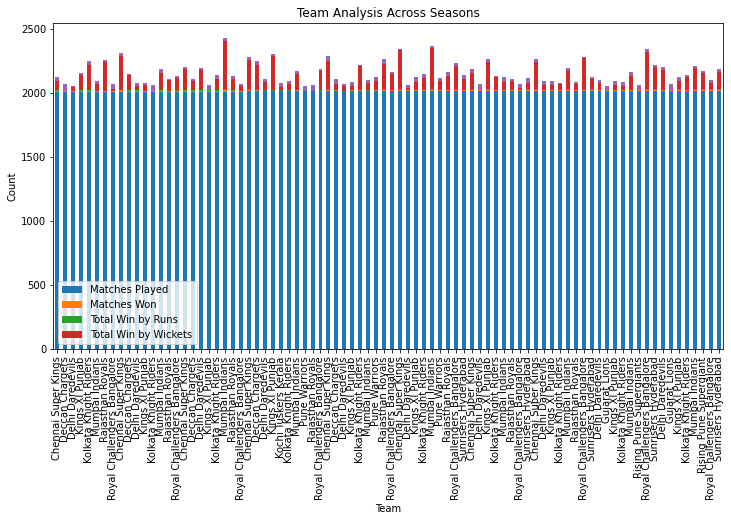

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
team_analysis = spark.sql("SELECT season, team1 AS team, COUNT(*) AS matches_played, \
                                  SUM(CASE WHEN team1 = winner THEN 1 ELSE 0 END) AS matches_won, \
                                  SUM(win_by_runs) AS total_win_by_runs, \
                                  SUM(win_by_wickets) AS total_win_by_wickets \
                           FROM matches \
                           GROUP BY season, team1 \
                           ORDER BY season, team1")

# Convert Spark DataFrame to Pandas DataFrame
team_analysis_df = team_analysis.toPandas()

# Plot the stacked bar chart
team_analysis_df.plot(kind='bar', x='team', stacked=True, 
                      title='Team Analysis Across Seasons', figsize=(12,6))

plt.xlabel('Team')
plt.ylabel('Count')
plt.legend(['Matches Played', 'Matches Won', 'Total Win by Runs', 'Total Win by Wickets'])
plt.show()


Batsman Analysis

In [0]:
%sql
SELECT player_of_match AS player, COUNT(*) AS matches_played, 
       SUM(batsman_runs) AS total_runs, 
       COUNT(DISTINCT match_id) AS unique_matches_played,
       SUM(CASE WHEN dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt' 
                THEN 1 ELSE 0 END) AS total_wickets_lost,
       AVG(batsman_runs) AS avg_runs_per_match,
       AVG(batsman_runs/CAST(ball AS FLOAT)) AS strike_rate
FROM deliveries
JOIN matches ON deliveries.match_id = matches.id
GROUP BY player_of_match
ORDER BY total_runs DESC


player,matches_played,total_runs,unique_matches_played,total_wickets_lost,avg_runs_per_match,strike_rate
CH Gayle,4194,5454,18,172,1.3004291845493563,0.49883658438737133
DA Warner,3592,4891,15,134,1.3616369710467706,0.5524585056739846
AB de Villiers,3693,4808,15,159,1.3019225561873815,0.5025392312354132
YK Pathan,3735,4611,16,160,1.2345381526104418,0.48586345381526114
RG Sharma,3425,4459,14,137,1.3018978102189782,0.5048340864326267
SK Raina,3400,4317,14,160,1.2697058823529412,0.4995553221288518
MS Dhoni,3159,4065,13,134,1.2867996201329535,0.5049062391654985
MEK Hussey,2905,3790,12,117,1.3046471600688467,0.5395915635330437
G Gambhir,3107,3598,13,113,1.158030254264564,0.47290565083452124
AM Rahane,2916,3528,12,113,1.2098765432098766,0.475410978291637


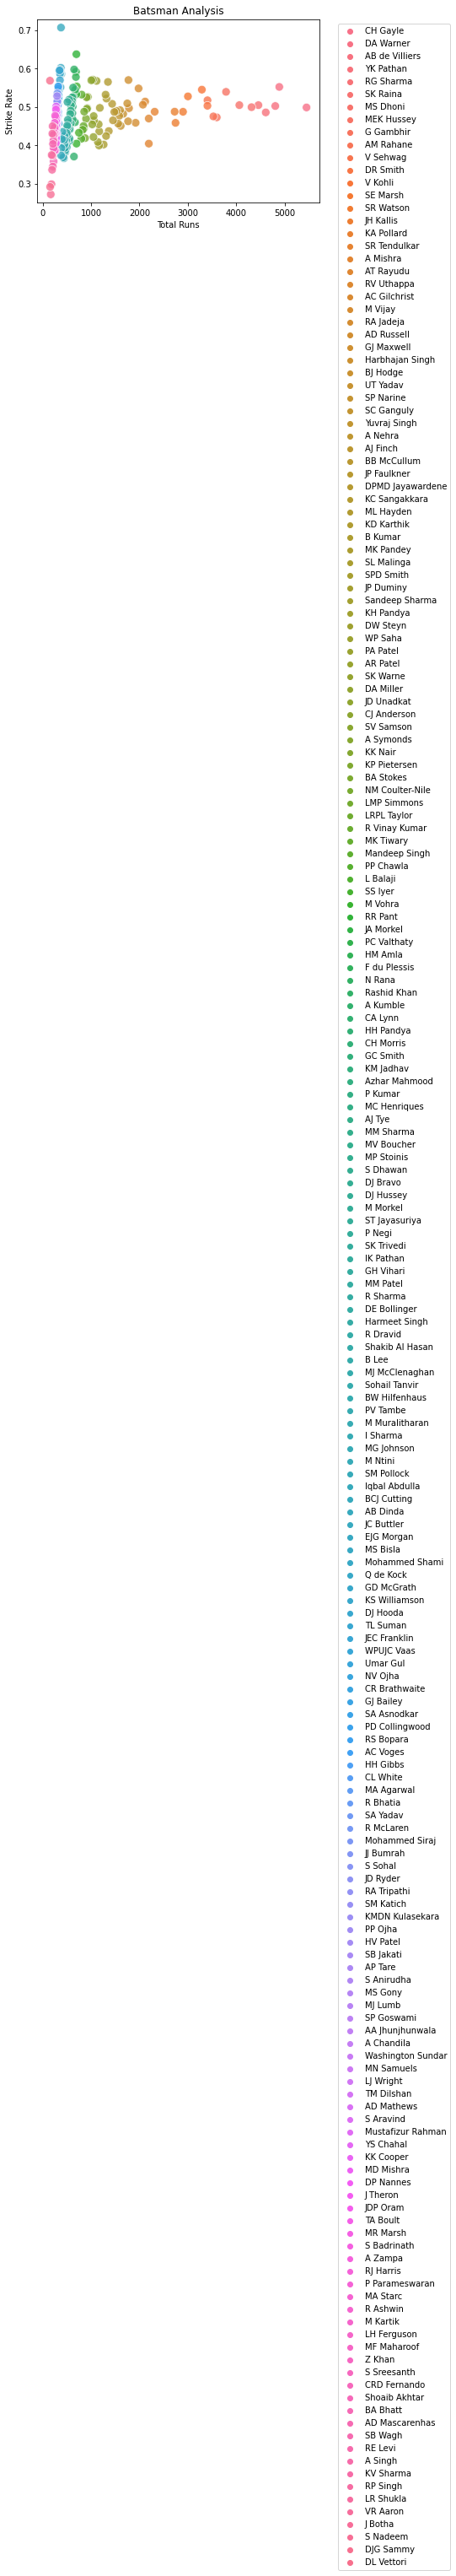

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the above SQL query using Databricks SQL API or Spark SQL
batsman_analysis = spark.sql("SELECT player_of_match AS player, COUNT(*) AS matches_played, \
                                     SUM(batsman_runs) AS total_runs, \
                                     COUNT(DISTINCT match_id) AS unique_matches_played, \
                                     SUM(CASE WHEN dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt' \
                                              THEN 1 ELSE 0 END) AS total_wickets_lost, \
                                     AVG(batsman_runs) AS avg_runs_per_match, \
                                     AVG(batsman_runs/CAST(ball AS FLOAT)) AS strike_rate \
                              FROM deliveries \
                              JOIN matches ON deliveries.match_id = matches.id \
                              GROUP BY player_of_match \
                              ORDER BY total_runs DESC")

# Convert Spark DataFrame to Pandas DataFrame
batsman_analysis_df = batsman_analysis.toPandas()

# Plot the scatter plot
sns.scatterplot(x="total_runs", y="strike_rate", data=batsman_analysis_df, hue="player", s=100, alpha=0.8)

plt.title('Batsman Analysis')
plt.xlabel('Total Runs')
plt.ylabel('Strike Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Bowler Analysis

In [0]:
%sql
SELECT bowler, COUNT(DISTINCT match_id) AS matches_played, 
       COUNT(*) AS total_balls_bowled, 
       SUM(total_runs) AS total_runs_conceded,
       SUM(CASE WHEN dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt' 
                THEN 1 ELSE 0 END) AS total_wickets_taken,
       SUM(extra_runs) AS total_extra_runs,
       SUM(CASE WHEN wide_runs != 0 THEN 1 ELSE 0 END) AS total_wides,
       SUM(CASE WHEN noball_runs != 0 THEN 1 ELSE 0 END) AS total_no_balls,
       SUM(total_runs)/COUNT(*) AS economy_rate
FROM deliveries
JOIN matches ON deliveries.match_id = matches.id
WHERE dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt'
GROUP BY bowler
ORDER BY total_wickets_taken DESC


bowler,matches_played,total_balls_bowled,total_runs_conceded,total_wickets_taken,total_extra_runs,total_wides,total_no_balls,economy_rate
SL Malinga,85,154,0,154,0,0,0,0.0
A Mishra,80,134,0,134,0,0,0,0.0
Harbhajan Singh,79,127,4,127,4,4,0,0.031496062992125984
PP Chawla,82,126,0,126,0,0,0,0.0
DJ Bravo,73,122,0,122,0,0,0,0.0
B Kumar,61,111,0,111,0,0,0,0.0
A Nehra,62,106,0,106,0,0,0,0.0
R Vinay Kumar,63,103,0,103,0,0,0,0.0
Z Khan,64,102,0,102,0,0,0,0.0
R Ashwin,69,100,3,100,3,3,0,0.03


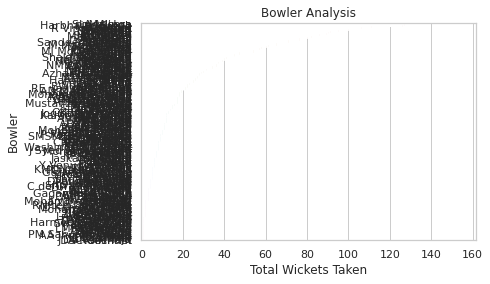

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the above SQL query using Databricks SQL API or Spark SQL
bowler_analysis = spark.sql("SELECT bowler, COUNT(DISTINCT match_id) AS matches_played, \
                                     COUNT(*) AS total_balls_bowled, \
                                     SUM(total_runs) AS total_runs_conceded, \
                                     SUM(CASE WHEN dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt' \
                                              THEN 1 ELSE 0 END) AS total_wickets_taken, \
                                     SUM(extra_runs) AS total_extra_runs, \
                                     SUM(CASE WHEN wide_runs != 0 THEN 1 ELSE 0 END) AS total_wides, \
                                     SUM(CASE WHEN noball_runs != 0 THEN 1 ELSE 0 END) AS total_no_balls, \
                                     SUM(total_runs)/COUNT(*) AS economy_rate \
                              FROM deliveries \
                              JOIN matches ON deliveries.match_id = matches.id \
                              WHERE dismissal_kind != 'run out' AND dismissal_kind != 'retired hurt' \
                              GROUP BY bowler \
                              ORDER BY total_wickets_taken DESC")

# Convert Spark DataFrame to Pandas DataFrame
bowler_analysis_df = bowler_analysis.toPandas()

# Plot the bar chart
sns.set(style="whitegrid")
sns.barplot(x="total_wickets_taken", y="bowler", data=bowler_analysis_df)

plt.title('Bowler Analysis')
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.show()


Toss Decisions across Seasons

In [0]:
%sql
SELECT season, COUNT(*) AS total_matches, 
       SUM(CASE WHEN toss_decision = 'bat' THEN 1 ELSE 0 END) AS total_bat_first,
       SUM(CASE WHEN toss_decision = 'field' THEN 1 ELSE 0 END) AS total_field_first
FROM matches
GROUP BY season
ORDER BY season

season,total_matches,total_bat_first,total_field_first
2008,58,26,32
2009,57,35,22
2010,60,39,21
2011,73,25,48
2012,74,37,37
2013,76,45,31
2014,60,19,41
2015,59,25,34
2016,60,11,49
2017,59,11,48


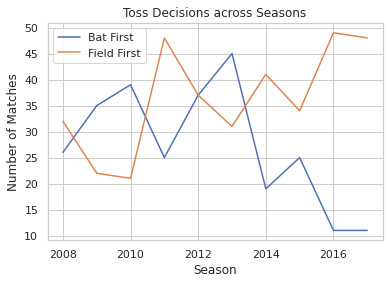

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the above SQL query using Databricks SQL API or Spark SQL
toss_analysis = spark.sql("SELECT season, COUNT(*) AS total_matches, \
                                   SUM(CASE WHEN toss_decision = 'bat' THEN 1 ELSE 0 END) AS total_bat_first, \
                                   SUM(CASE WHEN toss_decision = 'field' THEN 1 ELSE 0 END) AS total_field_first \
                            FROM matches \
                            GROUP BY season \
                            ORDER BY season")

# Convert Spark DataFrame to Pandas DataFrame
toss_analysis_df = toss_analysis.toPandas()

# Plot the line chart
sns.set(style="whitegrid")
sns.lineplot(x="season", y="total_bat_first", data=toss_analysis_df)
sns.lineplot(x="season", y="total_field_first", data=toss_analysis_df)

plt.title('Toss Decisions across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(labels=['Bat First', 'Field First'])
plt.show()

Maximum Toss Winners

In [0]:
%sql
SELECT toss_winner, COUNT(*) AS total_toss_wins
FROM matches
GROUP BY toss_winner
ORDER BY total_toss_wins DESC


toss_winner,total_toss_wins
Mumbai Indians,85
Kolkata Knight Riders,78
Delhi Daredevils,72
Royal Challengers Bangalore,70
Kings XI Punjab,68
Chennai Super Kings,66
Rajasthan Royals,63
Deccan Chargers,43
Sunrisers Hyderabad,35
Pune Warriors,20


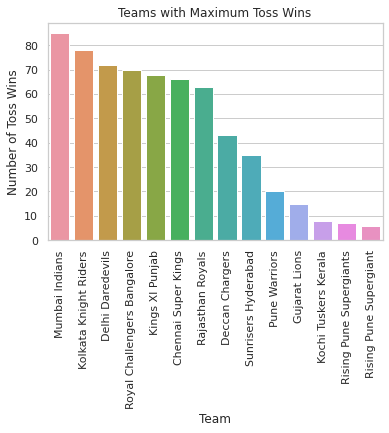

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Execute the above SQL query using Databricks SQL API or Spark SQL
toss_wins = spark.sql("SELECT toss_winner, COUNT(*) AS total_toss_wins \
                       FROM matches \
                       GROUP BY toss_winner \
                       ORDER BY total_toss_wins DESC")

# Convert Spark DataFrame to Pandas DataFrame
toss_wins_df = toss_wins.toPandas()

# Plot the bar chart
sns.set(style="whitegrid")
sns.barplot(x="toss_winner", y="total_toss_wins", data=toss_wins_df)

plt.title('Teams with Maximum Toss Wins')
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.xticks(rotation=90)
plt.show()


Total Matches vs Wins for Teams (INTERACTIVE)

In [0]:
%sql
SELECT team, COUNT(*) AS total_matches, 
       SUM(CASE WHEN winner = team THEN 1 ELSE 0 END) AS total_wins
FROM (SELECT team1 AS team, id, winner FROM matches
      UNION ALL
      SELECT team2 AS team, id, winner FROM matches)
GROUP BY team


team,total_matches,total_wins
Sunrisers Hyderabad,76,42
Chennai Super Kings,131,79
Rising Pune Supergiant,16,10
Deccan Chargers,75,29
Kochi Tuskers Kerala,14,6
Rajasthan Royals,118,63
Gujarat Lions,30,13
Royal Challengers Bangalore,152,73
Kolkata Knight Riders,148,77
Rising Pune Supergiants,14,5


In [0]:
# Execute the above SQL query using Databricks SQL API or Spark SQL
total_matches_wins = spark.sql("SELECT team, COUNT(*) AS total_matches, \
                                          SUM(CASE WHEN winner = team THEN 1 ELSE 0 END) AS total_wins \
                                FROM (SELECT team1 AS team, id, winner FROM matches \
                                      UNION ALL \
                                      SELECT team2 AS team, id, winner FROM matches) \
                                GROUP BY team")

# Convert Spark DataFrame to Pandas DataFrame
total_matches_wins_df = total_matches_wins.toPandas()

# Create an interactive scatter plot using Databricks
display(total_matches_wins_df)


team,total_matches,total_wins
Sunrisers Hyderabad,76,42
Chennai Super Kings,131,79
Rising Pune Supergiant,16,10
Deccan Chargers,75,29
Kochi Tuskers Kerala,14,6
Rajasthan Royals,118,63
Gujarat Lions,30,13
Royal Challengers Bangalore,152,73
Kolkata Knight Riders,148,77
Rising Pune Supergiants,14,5


Is Toss Winner Also the Match Winner?

In [0]:
%sql
SELECT CASE WHEN toss_winner = winner THEN 'Yes' ELSE 'No' END AS toss_win_match_win, COUNT(*) AS total_matches
FROM matches
GROUP BY toss_win_match_win


toss_win_match_win,total_matches
No,311
Yes,325


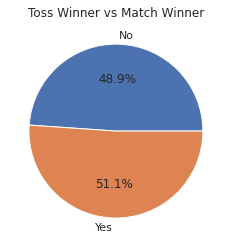

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
toss_win_match_win = spark.sql("SELECT CASE WHEN toss_winner = winner THEN 'Yes' ELSE 'No' END AS toss_win_match_win, \
                                        COUNT(*) AS total_matches \
                                FROM matches \
                                GROUP BY toss_win_match_win")

# Convert Spark DataFrame to Pandas DataFrame
toss_win_match_win_df = toss_win_match_win.toPandas()

# Plot the pie chart
plt.pie(toss_win_match_win_df['total_matches'], labels=toss_win_match_win_df['toss_win_match_win'], autopct='%1.1f%%')
plt.title('Toss Winner vs Match Winner')
plt.show()


Matches played across each season

In [0]:
%sql
SELECT season, COUNT(*) AS total_matches
FROM matches
GROUP BY season
ORDER BY season ASC


season,total_matches
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60
2017,59


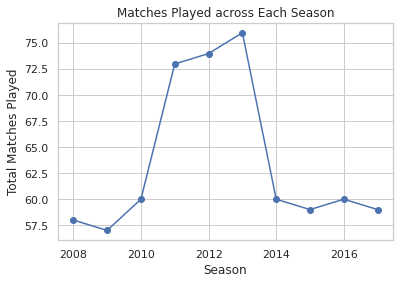

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
matches_per_season = spark.sql("SELECT season, COUNT(*) AS total_matches \
                                FROM matches \
                                GROUP BY season \
                                ORDER BY season ASC")

# Convert Spark DataFrame to Pandas DataFrame
matches_per_season_df = matches_per_season.toPandas()

# Plot the line chart
plt.plot(matches_per_season_df['season'], matches_per_season_df['total_matches'], marker='o')
plt.title('Matches Played across Each Season')
plt.xlabel('Season')
plt.ylabel('Total Matches Played')
plt.show()


Runs Across the Seasons

In [0]:
%sql
SELECT season, SUM(total_runs) AS total_runs_scored
FROM matches
JOIN deliveries ON matches.id = deliveries.match_id
GROUP BY season
ORDER BY season ASC


season,total_runs_scored
2008,17937
2009,16353
2010,18883
2011,21154
2012,22453
2013,22602
2014,18931
2015,18353
2016,18862
2017,18786


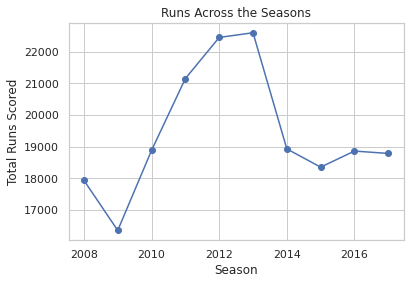

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
runs_per_season = spark.sql("SELECT season, SUM(total_runs) AS total_runs_scored \
                            FROM matches \
                            JOIN deliveries ON matches.id = deliveries.match_id \
                            GROUP BY season \
                            ORDER BY season ASC")

# Convert Spark DataFrame to Pandas DataFrame
runs_per_season_df = runs_per_season.toPandas()

# Plot the line chart
plt.plot(runs_per_season_df['season'], runs_per_season_df['total_runs_scored'], marker='o')
plt.title('Runs Across the Seasons')
plt.xlabel('Season')
plt.ylabel('Total Runs Scored')
plt.show()


Average runs per match in each Season

In [0]:
%sql
SELECT season, AVG(total_runs) AS avg_runs_per_match
FROM matches
JOIN deliveries ON matches.id = deliveries.match_id
GROUP BY season
ORDER BY season ASC


season,avg_runs_per_match
2008,1.32975016680258
2009,1.2018962222548875
2010,1.30245551110498
2011,1.2434021042732029
2012,1.263747396859346
2013,1.2434395114705397
2014,1.323846153846154
2015,1.344345150893642
2016,1.3381101021566402
2017,1.3552156975905352


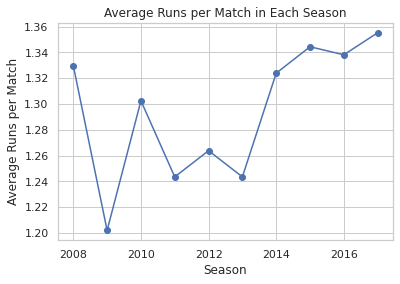

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
avg_runs_per_match = spark.sql("SELECT season, AVG(total_runs) AS avg_runs_per_match \
                                FROM matches \
                                JOIN deliveries ON matches.id = deliveries.match_id \
                                GROUP BY season \
                                ORDER BY season ASC")

# Convert Spark DataFrame to Pandas DataFrame
avg_runs_per_match_df = avg_runs_per_match.toPandas()

# Plot the line chart
plt.plot(avg_runs_per_match_df['season'], avg_runs_per_match_df['avg_runs_per_match'], marker='o')
plt.title('Average Runs per Match in Each Season')
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.show()


Sixes and Fours Across the Season

In [0]:
%sql
SELECT season, SUM(CASE WHEN batsman_runs=4 THEN 1 ELSE 0 END) AS fours, 
       SUM(CASE WHEN batsman_runs=6 THEN 1 ELSE 0 END) AS sixes
FROM deliveries
JOIN matches ON deliveries.match_id = matches.id
GROUP BY season
ORDER BY season ASC


season,fours,sixes
2008,1703,623
2009,1321,508
2010,1709,587
2011,1916,639
2012,1911,733
2013,2054,681
2014,1563,715
2015,1611,692
2016,1633,639
2017,1612,706


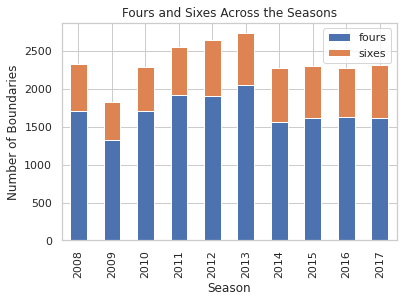

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
fours_and_sixes_per_season = spark.sql("SELECT season, SUM(CASE WHEN batsman_runs=4 THEN 1 ELSE 0 END) AS fours, \
                                               SUM(CASE WHEN batsman_runs=6 THEN 1 ELSE 0 END) AS sixes \
                                        FROM deliveries \
                                        JOIN matches ON deliveries.match_id = matches.id \
                                        GROUP BY season \
                                        ORDER BY season ASC")

# Convert Spark DataFrame to Pandas DataFrame
fours_and_sixes_per_season_df = fours_and_sixes_per_season.toPandas()

# Plot the grouped bar chart
fours_and_sixes_per_season_df.plot(x='season', kind='bar', stacked=True)
plt.title('Fours and Sixes Across the Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Boundaries')
plt.show()


Runs Per Over By Teams Across Seasons

In [0]:
%sql
SELECT m.season, d.batting_team, d.over, SUM(d.total_runs) AS runs
FROM deliveries d
JOIN matches m ON d.match_id = m.id
GROUP BY m.season, d.batting_team, d.over
ORDER BY m.season ASC, d.batting_team ASC, d.over ASC


season,batting_team,over,runs
2008,Chennai Super Kings,1,90
2008,Chennai Super Kings,2,137
2008,Chennai Super Kings,3,119
2008,Chennai Super Kings,4,114
2008,Chennai Super Kings,5,126
2008,Chennai Super Kings,6,136
2008,Chennai Super Kings,7,126
2008,Chennai Super Kings,8,118
2008,Chennai Super Kings,9,112
2008,Chennai Super Kings,10,104


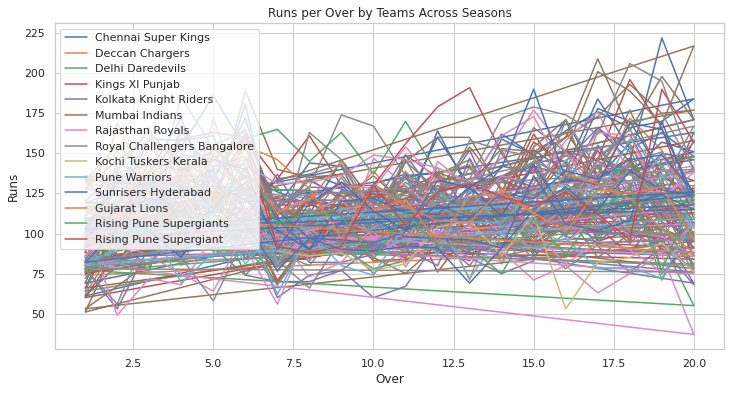

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
runs_per_over_by_teams = spark.sql("SELECT m.season, d.batting_team, d.over, SUM(d.total_runs) AS runs \
                                    FROM deliveries d \
                                    JOIN matches m ON d.match_id = m.id \
                                    GROUP BY m.season, d.batting_team, d.over \
                                    ORDER BY m.season ASC, d.batting_team ASC, d.over ASC")

# Convert Spark DataFrame to Pandas DataFrame
runs_per_over_by_teams_df = runs_per_over_by_teams.toPandas()

# Plot the line chart
fig, ax = plt.subplots(figsize=(12, 6))
for team in runs_per_over_by_teams_df['batting_team'].unique():
    data = runs_per_over_by_teams_df[runs_per_over_by_teams_df['batting_team'] == team]
    ax.plot(data['over'], data['runs'], label=team)
ax.legend()
plt.title('Runs per Over by Teams Across Seasons')
plt.xlabel('Over')
plt.ylabel('Runs')
plt.show()


Favorite Grounds

In [0]:
%sql
SELECT team1, venue, COUNT(*) AS matches_played
FROM matches
GROUP BY team1, venue
ORDER BY team1 ASC, matches_played DESC


team1,venue,matches_played
Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",30
Chennai Super Kings,Eden Gardens,4
Chennai Super Kings,M Chinnaswamy Stadium,4
Chennai Super Kings,JSCA International Stadium Complex,3
Chennai Super Kings,Dr DY Patil Sports Academy,3
Chennai Super Kings,Sawai Mansingh Stadium,3
Chennai Super Kings,SuperSport Park,3
Chennai Super Kings,Feroz Shah Kotla,3
Chennai Super Kings,Kingsmead,3
Chennai Super Kings,Sheikh Zayed Stadium,2


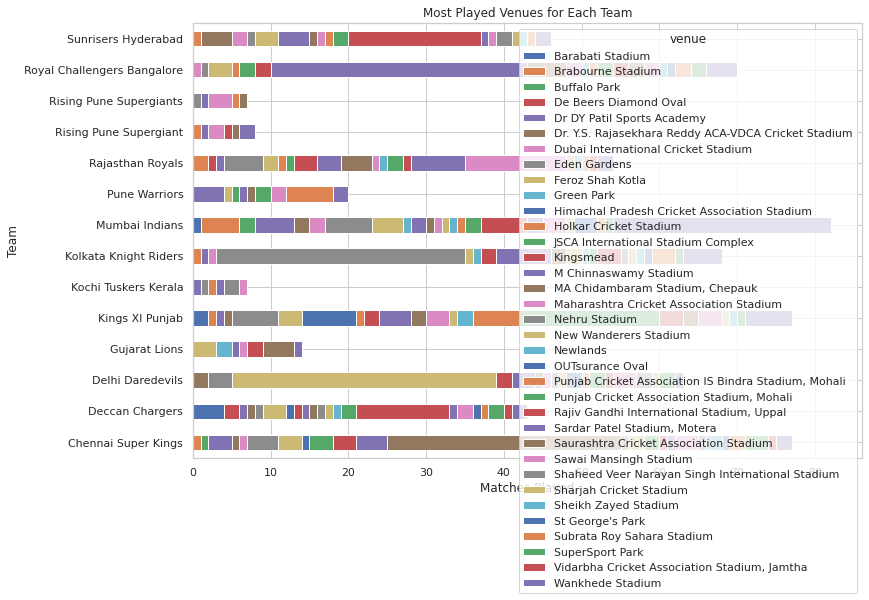

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Execute the above SQL query using Databricks SQL API or Spark SQL
matches_played_by_team_venue = spark.sql("SELECT team1, venue, COUNT(*) AS matches_played \
                                          FROM matches \
                                          GROUP BY team1, venue \
                                          ORDER BY team1 ASC, matches_played DESC")

# Convert Spark DataFrame to Pandas DataFrame
matches_played_by_team_venue_df = matches_played_by_team_venue.toPandas()

# Pivot the DataFrame to create a horizontal stacked bar chart
matches_played_by_team_venue_pivot = matches_played_by_team_venue_df.pivot(index='team1', columns='venue', values='matches_played')
matches_played_by_team_venue_pivot.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Most Played Venues for Each Team')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.show()
